In [36]:
#importation
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import sys  
sys.path.insert(0, '../scripts')
import clean_data
import os
import warnings
warnings.filterwarnings('ignore')

In [37]:
#loading data and displaying columns
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(parent_dir, "data", "Week1_challenge_data_source.csv")                             
db = pd.read_csv(data_path)
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [41]:
user_experience=db[['Handset Type','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP UL (kbps)','Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

In [42]:
handset_null = user_experience.isnull().sum()
print(handset_null)
for column in user_experience.columns:
    if(column=='Handset Type'):
        user_experience[column] = user_experience[column].fillna( user_experience[column].mode().values[0] )
        user_experience[column] = user_experience[column].replace(['undefined'],user_experience[column].mode().values[0])
    else:
        user_experience[column] = user_experience[column].fillna( user_experience[column].mean() )

null_val = user_experience.isnull().sum()
null_val

Handset Type                     572
Avg RTT DL (ms)                27829
Avg RTT UL (ms)                27812
Avg Bearer TP UL (kbps)            1
Avg Bearer TP DL (kbps)            1
TCP DL Retrans. Vol (Bytes)    88146
TCP UL Retrans. Vol (Bytes)    96649
dtype: int64


Handset Type                   0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Avg Bearer TP UL (kbps)        0
Avg Bearer TP DL (kbps)        0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
dtype: int64

In [47]:
user_experience['TCP Retrans(UL/DL)'] = user_experience['TCP UL Retrans. Vol (Bytes)']+user_experience['TCP DL Retrans. Vol (Bytes)']
user_experience['Avg RTT(UL/DL)'] = user_experience['Avg RTT UL (ms)']+user_experience['Avg RTT DL (ms)']
user_experience['Avg Bearer TP(UL/DL)'] = user_experience['Avg Bearer TP UL (kbps)']+user_experience['Avg Bearer TP DL (kbps)']

In [48]:
user_experience['Customer Number'] = db['MSISDN/Number']
tot_user_exper=user_experience[['Customer Number', 'Handset Type', 'Avg Bearer TP(UL/DL)','Avg RTT(UL/DL)', 'TCP Retrans(UL/DL)']]
usr_expr = tot_user_exper.groupby('Customer Number').sum()

usr_expr['No. of Handset'] = tot_user_exper.groupby('Customer Number')['Handset Type'].nunique()
usr_expr 

,Avg Bearer TP(UL/DL),Avg RTT(UL/DL),TCP Retrans(UL/DL),No. of Handset
Customer Number,,,,
3.360100e+10,76.0,46.000000,2.156957e+07,1
3.360100e+10,99.0,31.000000,2.156957e+07,1
3.360100e+10,97.0,127.458589,2.156957e+07,1
3.360101e+10,248.0,84.000000,7.607247e+05,1
3.360101e+10,56844.0,119.000000,3.094040e+07,1
...,...,...,...,...
3.379000e+10,10365.0,52.000000,2.180450e+05,1
3.379000e+10,116.0,40.000000,2.156957e+07,1
3.197020e+12,1.0,127.458589,2.156957e+07,1


In [49]:
print(' \nTEN HIGHEST TCP TRANSMISSION\n')
print(usr_expr['Avg Bearer TP(UL/DL)'].value_counts().head(10))
print(' \nTEN HIGHEST RTT TRANSMISSION\n')
print(usr_expr['Avg RTT(UL/DL)'].value_counts().head(10))
print(' \nTEN HIGHEST THROUGHPUT\n')
usr_expr['Avg Bearer TP(UL/DL)'].value_counts().head(10)

 
TEN HIGHEST TCP TRANSMISSION

15.0    2685
63.0    2072
97.0    1023
90.0    1005
98.0     971
96.0     866
99.0     853
89.0     817
95.0     798
91.0     793
Name: Avg Bearer TP(UL/DL), dtype: int64
 
TEN HIGHEST RTT TRANSMISSION

127.458589    16353
29.000000      2736
39.000000      2162
254.917178     1908
38.000000      1446
30.000000      1419
40.000000      1383
28.000000      1330
49.000000      1194
31.000000      1053
Name: Avg RTT(UL/DL), dtype: int64
 
TEN HIGHEST THROUGHPUT



15.0    2685
63.0    2072
97.0    1023
90.0    1005
98.0     971
96.0     866
99.0     853
89.0     817
95.0     798
91.0     793
Name: Avg Bearer TP(UL/DL), dtype: int64

In [50]:
tcpBasedExperience = usr_expr.nlargest(10,'Avg Bearer TP(UL/DL)')
rttBasedExperience = usr_expr.nlargest(10,'Avg RTT(UL/DL)')
tpBasedExperience = usr_expr.nlargest(10,'TCP Retrans(UL/DL)')
print(' \nTOP TEN CUSTOMERS BASED ON TCP RETRANSMISION\n')
print(tcpBasedExperience)
print(' \nTOP TEN CUSTOMERS BASED ON TCP RTT\n')
print(rttBasedExperience)
print(' \nTTOP TEN CUSTOMERS BASED ON THROUGHPUT\n')
print(tpBasedExperience)

 
TOP TEN CUSTOMERS BASED ON TCP RETRANSMISION

                 Avg Bearer TP(UL/DL)  Avg RTT(UL/DL)  TCP Retrans(UL/DL)  \
Customer Number                                                             
3.376233e+10                 902222.0      400.000000        2.788275e+07   
3.366871e+10                 840424.0      500.000000        1.429871e+08   
3.365955e+10                 798342.0      588.000000        3.472787e+07   
3.366995e+10                 690815.0      370.000000        6.271756e+07   
3.366843e+10                 676858.0      382.000000        7.876596e+08   
3.369817e+10                 618797.0      488.375767        1.260983e+08   
3.362570e+10                 564179.0      708.917178        7.100243e+07   
3.365808e+10                 550352.0      567.000000        2.878409e+07   
3.376264e+10                 549661.0     2860.000000        5.879989e+09   
3.366566e+10                 530353.0      188.000000        1.124825e+07   

                 No. of Han

In [51]:
from sklearn.cluster import KMeans
x = usr_expr[['Avg Bearer TP(UL/DL)','Avg RTT(UL/DL)', 'TCP Retrans(UL/DL)']].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)
normalized = pd.DataFrame(x_scaled,columns=['Avg Bearer TP(UL/DL)','Avg RTT(UL/DL)', 'TCP Retrans(UL/DL)'])
KMean_clust= KMeans(n_clusters=3, init='k-means++',max_iter=1000)
KMean_clust.fit(normalized)
metric=usr_expr[['Avg Bearer TP(UL/DL)','Avg RTT(UL/DL)', 'TCP Retrans(UL/DL)']]
metric['Cluster']=KMean_clust.labels_
metric

,Avg Bearer TP(UL/DL),Avg RTT(UL/DL),TCP Retrans(UL/DL),Cluster
Customer Number,,,,
3.360100e+10,76.0,46.000000,2.156957e+07,0
3.360100e+10,99.0,31.000000,2.156957e+07,0
3.360100e+10,97.0,127.458589,2.156957e+07,0
3.360101e+10,248.0,84.000000,7.607247e+05,0
3.360101e+10,56844.0,119.000000,3.094040e+07,2
...,...,...,...,...
3.379000e+10,10365.0,52.000000,2.180450e+05,0
3.379000e+10,116.0,40.000000,2.156957e+07,0
3.197020e+12,1.0,127.458589,2.156957e+07,0


In [52]:
clusteredMean = metric.groupby('Cluster').mean()
clusteredMean

,Avg Bearer TP(UL/DL),Avg RTT(UL/DL),TCP Retrans(UL/DL)
Cluster,,,
0,4820.382024,167.192941,2.144235e+07
1,209915.282109,397.580360,2.408296e+08
2,67407.383175,183.708397,3.962415e+07


0    85301
2    18900
1     2655
Name: Cluster, dtype: int64

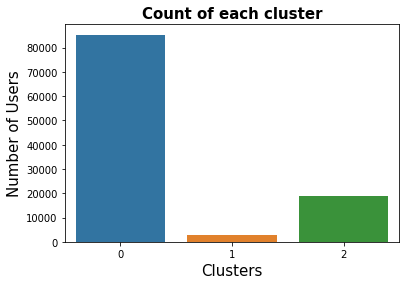

In [54]:
clustered=metric['Cluster'].value_counts()
ax=sb.barplot(clustered.index, clustered.values)
ax.set_xlabel('Clusters', fontsize=15)
ax.set_ylabel('Number of Users' , fontsize=15)
ax.set_title('Count of each cluster', fontsize=15, fontweight='bold')
clustered